# Домашня робота №7

# Перетворення випадкових величин та векторів

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Нормальний розподіл

### 1.1 Завдання 1.1

Розглянемо три незалежні випадкові величини $\xi_1, \xi_2, \theta$ такі,
що $\xi_1, \xi_2 \sim N(0, 1), \theta \sim Uniform(0, 2 \pi)$.

Який розподіл має випадкова величина $\displaystyle \zeta = \xi_1 \cos \theta + \xi_2 \sin \theta$?
1. Згенеруйте $n = 10000$ значень випадкових величин $\xi_1, \xi_2, \theta$;
2. Отримайте $n = 10000$ значень випадкової величини $\zeta$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\zeta$;
   - функцію щільності випадкової величини $\zeta$.

**Зауваження.** Передбачається використання теореми про лінійне перетворення нормальних величин.

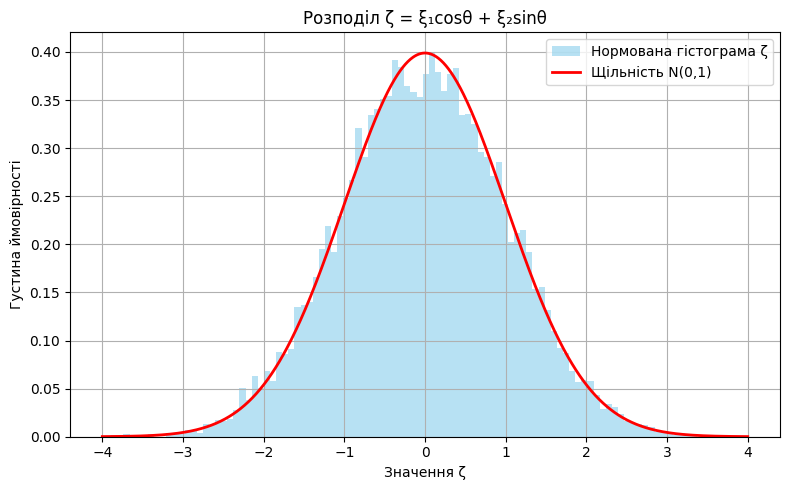

In [3]:
from scipy.stats import norm

n = 10000
xi1 = np.random.normal(0, 1, n)
xi2 = np.random.normal(0, 1, n)
theta = np.random.uniform(0, 2 * np.pi, n)

zeta = xi1 * np.cos(theta) + xi2 * np.sin(theta)

x_vals = np.linspace(-4, 4, 1000)
pdf_vals = norm.pdf(x_vals, loc=0, scale=1)

plt.figure(figsize=(8, 5))
plt.hist(zeta, bins=100, density=True, alpha=0.6, color='skyblue', label='Нормована гістограма ζ')
plt.plot(x_vals, pdf_vals, 'r-', lw=2, label='Щільність N(0,1)')
plt.title("Розподіл ζ = ξ₁cosθ + ξ₂sinθ")
plt.xlabel("Значення ζ")
plt.ylabel("Густина ймовірності")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 1.1 Завдання 1.2

Розглянемо дві незалежні випадкові величини $\xi_1, \xi_2$ зі стандартного нормального розподілу.
Тобто $\xi_1, \xi_2 \sim N(0, 1)$.

Які розподіли (щільності) мають випадкові величини $\displaystyle \zeta = \sqrt{\xi_1^2 + \xi_2^2}, \eta = \arccos \frac{\xi_1}{\zeta}$?
1. Згенеруйте $n = 10000$ значень випадкових величин $\xi_1, \xi_2$;
2. Отримайте $n = 10000$ значень випадкової величини $\zeta$;
3. Отримайте $n = 10000$ значень випадкової величини $\eta$;
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\zeta$;
   - функцію щільності випадкової величини $\zeta$;
5. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\eta$.

**Зауваження 1.** Передбачається використання теореми про обрахунок щільності функції від випадкової величини (через якобіан оберненого відображення).

**Зауваження 2.** Насправді, розподіл отриманих значень випадкової величини $\eta$ буде трохи відрізнятися від порахованого теоретично (будуть інші параметри).
Так виходить за рахунок реалізації функції $\arccos$ (її області значень).

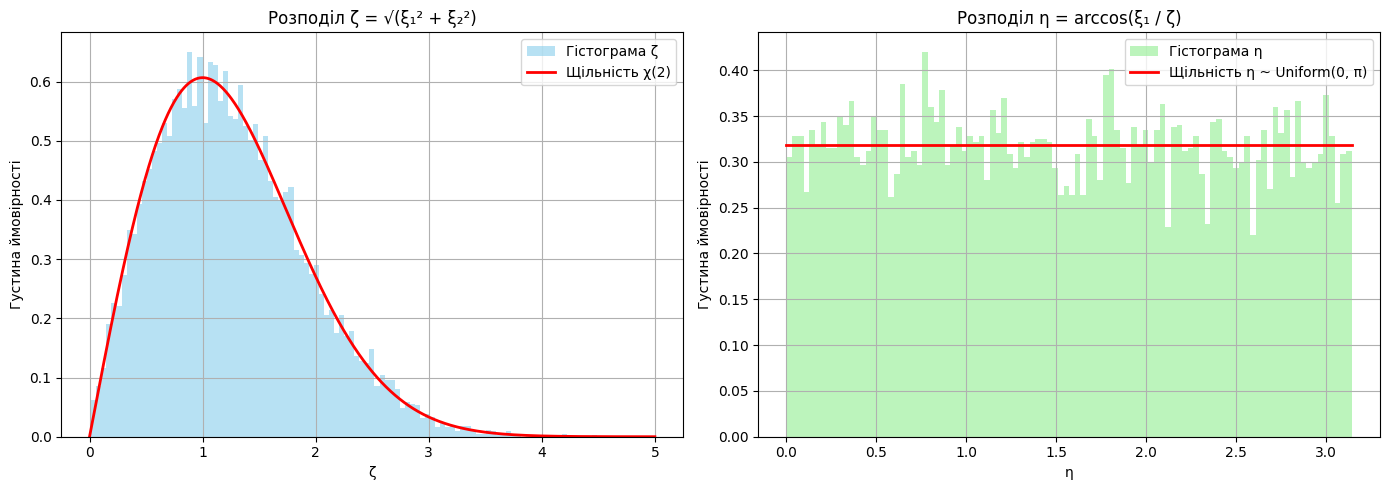

In [4]:
from scipy.stats import chi, uniform

n = 10000
xi1 = np.random.normal(0, 1, n)
xi2 = np.random.normal(0, 1, n)

zeta = np.sqrt(xi1**2 + xi2**2)
eta = np.arccos(xi1 / zeta)

z_vals = np.linspace(0, 5, 1000)
pdf_zeta = chi(df=2).pdf(z_vals)

eta_vals = np.linspace(0, np.pi, 1000)
pdf_eta = uniform(loc=0, scale=np.pi).pdf(eta_vals)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(zeta, bins=100, density=True, alpha=0.6, color='skyblue', label='Гістограма ζ')
axes[0].plot(z_vals, pdf_zeta, 'r-', lw=2, label='Щільність χ(2)')
axes[0].set_title("Розподіл ζ = √(ξ₁² + ξ₂²)")
axes[0].set_xlabel("ζ")
axes[0].set_ylabel("Густина ймовірності")
axes[0].legend()
axes[0].grid(True)

axes[1].hist(eta, bins=100, density=True, alpha=0.6, color='lightgreen', label='Гістограма η')
axes[1].plot(eta_vals, pdf_eta, 'r-', lw=2, label='Щільність η ~ Uniform(0, π)')
axes[1].set_title("Розподіл η = arccos(ξ₁ / ζ)")
axes[1].set_xlabel("η")
axes[1].set_ylabel("Густина ймовірності")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()
